# Image Recognition with ANN

- @philmui
- ASDRP Fall 2023 notebook

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

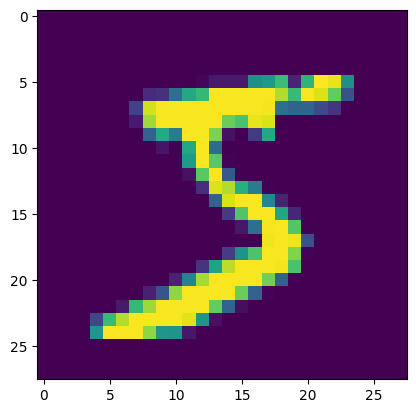

In [4]:
one_image = x_train[0]
plt.imshow(one_image)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### One-hot Encoding Target

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_cat_train = to_categorical(y_train)
y_cat_train.shape

(60000, 10)

In [8]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_cat_test = to_categorical(y_test)
y_cat_test.shape

(10000, 10)

### Normalize image data from 0-1

In [10]:
x_train = x_train/255
x_test = x_test/255

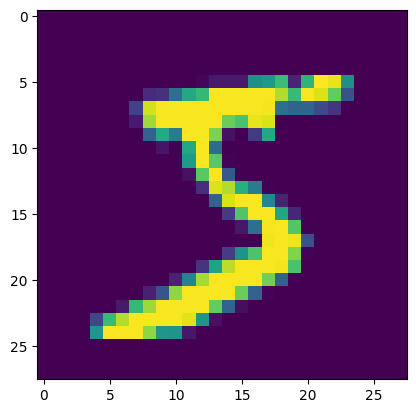

In [11]:
scaled_image = x_train[0]
plt.imshow(scaled_image)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
# reshape to add a dimension representing the color channel

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Training with Keras

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten

In [20]:
model = Sequential()

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

# keras.io/metrics

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', ])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)  

In [22]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2605 - accuracy: 0.9252 - val_loss: 0.1398 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1130 - accuracy: 0.9671 - val_loss: 0.0952 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0770 - accuracy: 0.9762 - val_loss: 0.0884 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9830 - val_loss: 0.0817 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0860 - val_accuracy: 0.9741


# Evaluation

In [23]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.260452,0.925217,0.139791,0.9584
1,0.113005,0.967067,0.095213,0.9703
2,0.077003,0.976217,0.088439,0.9732
3,0.057218,0.983033,0.081673,0.9744
4,0.044445,0.986700,0.085983,0.9741


<Axes: >

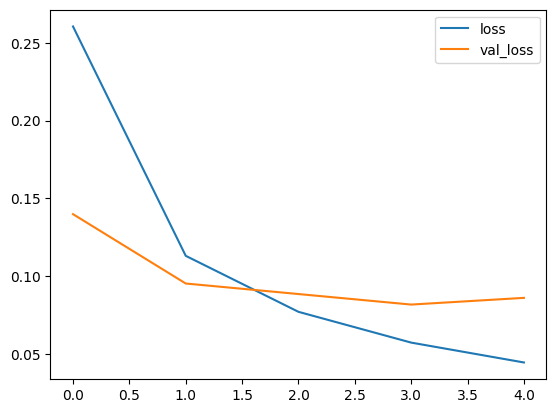

In [24]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

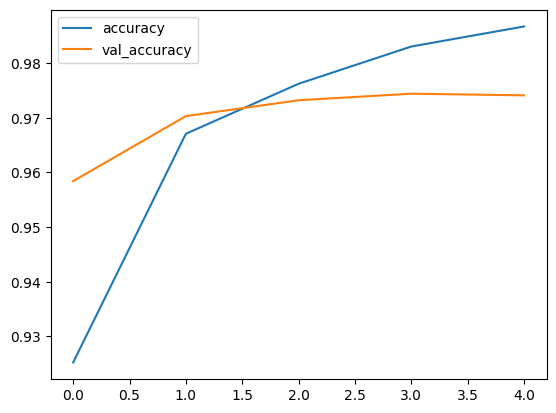

In [25]:
metrics[['accuracy', 'val_accuracy']].plot()

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.08598306775093079, 0.9740999937057495]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
predictions = model.predict(x_test)
predictions.shape

313/313 [==============================] - 0s 601us/step


(10000, 10)

In [30]:
y_pred = np.argmax(predictions, axis=1)
y_pred.shape

(10000,)

In [31]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
y_cat_test.shape

(10000, 10)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [34]:
confusion_matrix(y_test, y_pred)

array([[ 970,    1,    2,    1,    1,    2,    1,    0,    0,    2],
       [   0, 1127,    3,    0,    0,    1,    2,    0,    2,    0],
       [   5,    3, 1002,    1,    4,    0,    3,    7,    4,    3],
       [   0,    0,   12,  977,    1,    2,    0,    2,    1,   15],
       [   1,    0,    2,    0,  957,    1,    3,    1,    0,   17],
       [   3,    1,    1,    8,    1,  870,    2,    1,    1,    4],
       [   4,    3,    0,    1,    8,   11,  925,    0,    4,    2],
       [   1,    5,    9,    1,    1,    0,    0,  999,    2,   10],
       [   6,    0,    5,    5,    9,   11,    1,    3,  923,   11],
       [   2,    3,    0,    1,    5,    2,    0,    4,    1,  991]],
      dtype=int64)

<Axes: >

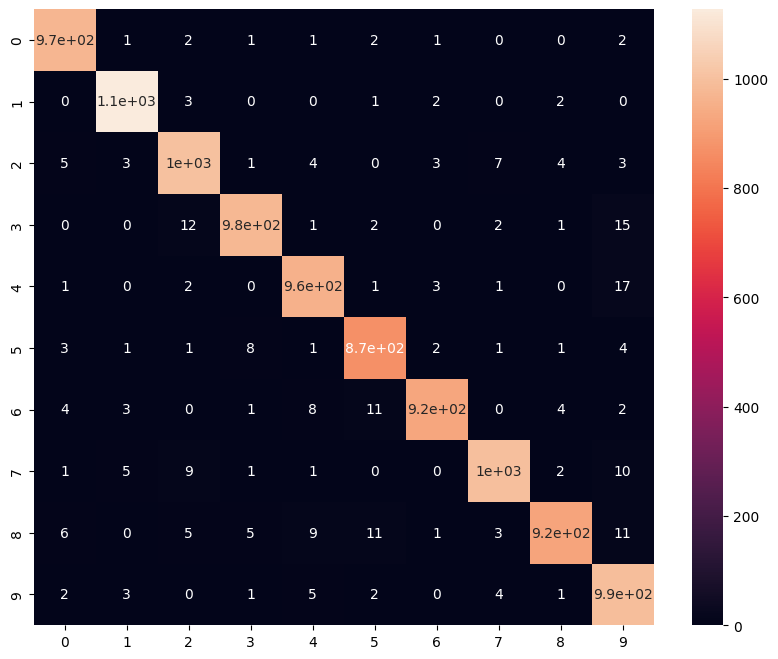

In [35]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Prediction

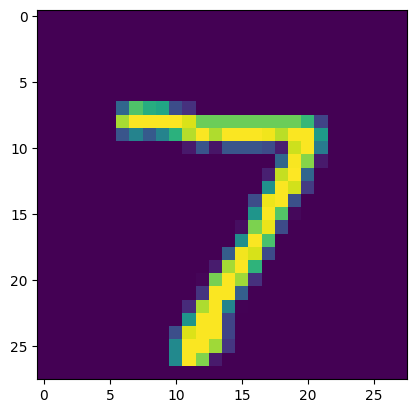

In [36]:
test_image = x_test[0]
plt.imshow(test_image)

In [37]:
# shape of input should be: (num_images, width, height, channels)
pred = model.predict(test_image.reshape(1, 28, 28, 1))
pred.shape

1/1 [==============================] - 0s 12ms/step


(1, 10)

In [38]:
np.argmax(pred)

7